In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Numpy example

In [2]:
x = np.random.beta(1,1, size=100000)
U = np.exp(x)
U.mean()

1.7167499731703324

PyMC example

In [3]:
model = pm.Model()

with model:

    S = pm.Gamma("S", alpha=1, beta=2/3)

    test = pm.Normal("result",mu=S,sigma=S, observed=3.5)

    outcome = pm.Normal("outcome",mu=S,sigma=S)


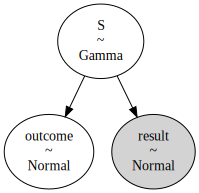

In [4]:
pm.model_to_graphviz(model)

In [5]:
with model:
    trace = pm.sample(draws= 10000,tune=1000,chains=2, random_seed=0)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
outcome,2.433,2.837,-2.369,8.158,0.039,0.032,6564.0,4770.0,1.0
S,2.440,1.127,0.944,4.564,0.014,0.010,6303.0,8255.0,1.0


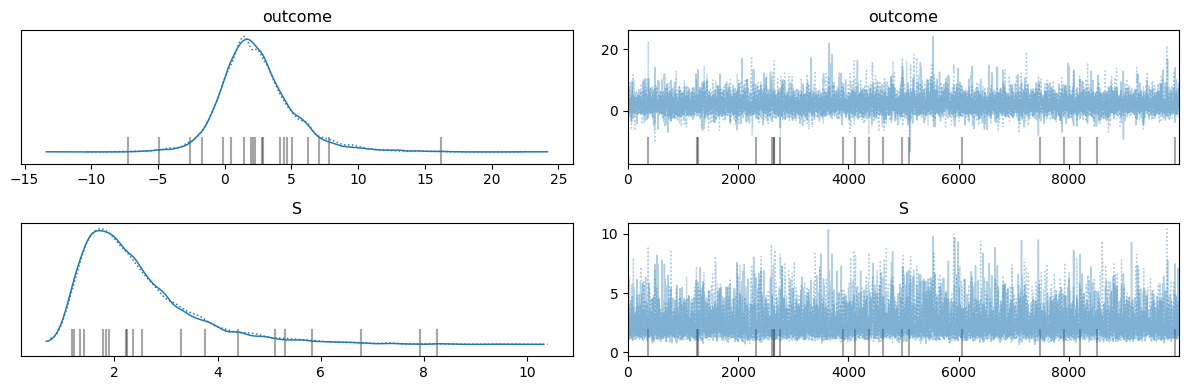

In [6]:
with model:
    display(az.summary(trace))
    az.plot_trace(trace)
    plt.tight_layout()

In [7]:
(trace['posterior']['outcome']).to_numpy().mean()

2.4326067601729124